In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
import torch
from PIL import Image
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
transform_train = transforms.Compose([
    transforms.Resize((32, 32)),  
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

In [3]:
train_data = datasets.ImageFolder(root='Dataset/train', transform=transform_train)
test_data = datasets.ImageFolder(root='Dataset/test', transform=transform_test)


In [ ]:
def plot_class_distribution(data, dataset_type, ax):
    class_distribution = {}
    for _, label in data:
        class_name = data.classes[label]
        if class_name in class_distribution:
            class_distribution[class_name] += 1
        else:
            class_distribution[class_name] = 1
    
    ax.bar(class_distribution.keys(), class_distribution.values(), color='orange')
    ax.set_title(f"{dataset_type} Dataset Class Distribution")
    ax.set_xlabel("Class")
    ax.set_ylabel("Number of Instances")
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Display class distribution for training dataset
plot_class_distribution(train_data, "Training", axs[0])

# Display class distribution for test dataset
plot_class_distribution(test_data, "Test", axs[1])

plt.tight_layout()
plt.show()

# Sample Images

In [ ]:
from PIL import Image
import  os
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [ ]:
folder_path = "Dataset/Sample"

# Get list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
# print(image_files)

# Set up subplots
num_images = len(image_files)
num_cols = 5  # Change this value according to your preference
num_rows = (num_images + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Iterate through images and display them
for i, image_file in enumerate(image_files):
    row = i // num_cols
    col = i % num_cols
    img_path = os.path.join(folder_path, image_file)
#     print(img_path)
    img = Image.open(img_path)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')    
    if row == 0:
        axes[row, col].set_title("Real")
    else:
        axes[row, col].set_title("Fake")

# Adjust layout
plt.tight_layout()
plt.show()

## Gaussion Blur

Gaussian blur is a widely utilized technique in image classification tasks due to its ability to reduce noise and emphasize important features. When applied to images, Gaussian blur smoothens out fine details by convolving the image with a Gaussian kernel, essentially averaging nearby pixels' values. This process helps in reducing the impact of high-frequency noise, making the image cleaner and more uniform.

In [ ]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Iterate through images, apply Gaussian blur, and display them
for i, image_file in enumerate(image_files):
    row = i // num_cols
    col = i % num_cols
    img_path = os.path.join(folder_path, image_file)
    img = cv2.imread(img_path)
    # Apply Gaussian blur
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)  # You can adjust the kernel size (5, 5) and sigma (0) as needed
    axes[row, col].imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
    axes[row, col].axis('off')
    # Set title for the first row
    if row == 0:
        axes[row, col].set_title("Real")
    else:
        axes[row, col].set_title("Fake")

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
folder_path = "Dataset/processing_images"

image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

img_path1 = os.path.join(folder_path, image_files[0])
Real_image = Image.open(img_path1)
Real_image_np = np.array(Real_image)

# Load the second image
img_path2 = os.path.join(folder_path, image_files[1])
Fake_image = Image.open(img_path2)
Fake_image_np = np.array(Fake_image)
# Set up subplots for 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first image
axes[0].imshow(img1)
axes[0].axis('off')
axes[0].set_title("REAL Image")

# Plot the second image
axes[1].imshow(img2)
axes[1].axis('off')
axes[1].set_title("FAKE Image")

# Adjust layout
plt.tight_layout()
plt.show()


## Image Erosion

Erosion is a process that shrinks or erodes the boundaries of foreground objects in a binary image. It works by sliding a structuring element (also called a kernel or mask) over the image and determining the minimum pixel value within the region covered by the kernel. If the center pixel of the kernel matches the foreground pixel in the image, it remains unchanged; otherwise, it is set to the background value (typically zero)

In [ ]:
kernel = np.ones((5, 5), np.uint8)
eroded_real = cv2.erode(Real_image_np, kernel, iterations=1)
eroded_fake = cv2.erode(Fake_image_np, kernel, iterations=1)

# Display eroded images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(eroded_real, cmap='gray')
axes[0].axis('off')
axes[0].set_title("Eroded REAL Image")

axes[1].imshow(eroded_fake, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Eroded FAKE Image")

# Adjust layout
plt.tight_layout()
plt.show()

## Image Dilation

Dilation, on the other hand, expands or dilates the boundaries of foreground objects in a binary image. It involves sliding a structuring element over the image and determining the maximum pixel value within the region covered by the kernel. If at least one pixel under the kernel is foreground (non-zero), the center pixel of the kernel in the output image is set to foreground as well. Dilation increases the size of objects and fills in small gaps or holes within them

In [ ]:
kernel = np.ones((5, 5), np.uint8)
dilated_real = cv2.dilate(Real_image_np, kernel, iterations=1)
dilated_fake = cv2.dilate(Fake_image_np, kernel, iterations=1)

# Display dilated images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(dilated_real, cmap='gray')
axes[0].axis('off')
axes[0].set_title("Dilated REAL Image")

axes[1].imshow(dilated_fake, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Dilated FAKE Image")

# Adjust layout
plt.tight_layout()
plt.show()

# Edge Detection (Sobel and Canny Edges)

Sobel edges are valuable in image classification because they highlight significant changes in intensity, effectively capturing the outlines and boundaries of objects within an image. By emphasizing these edges, Sobel edge detection helps in extracting essential features for classification, such as object shapes and structures. This makes it particularly useful in scenarios where precise delineation of object boundaries is crucial, such as in medical imaging or industrial quality control.

Canny edges excel in identifying edges while minimizing noise and false positives. This precision is essential in image classification tasks where accurate feature extraction is paramount. By employing Canny edge detection, classifiers can focus on relevant features while reducing the influence of irrelevant details and noise in the image. This enhances the robustness and accuracy of the classification process, especially in complex scenes or noisy environments.

In [ ]:
import cv2

In [ ]:
gray_image = cv2.cvtColor(Real_image_np, cv2.COLOR_BGR2GRAY)

# Apply Sobel operator to get gradients
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)

# Calculate the magnitude of the gradient
magnitude_gradient = cv2.magnitude(sobel_x, sobel_y)

# Apply edge detection
edges = cv2.Canny(gray_image, 100, 200)

# Display original image and edges
fig, axs = plt.subplots(1, 3, figsize=(21, 7))

# Original image
axs[0].imshow(cv2.cvtColor(Real_image_np, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Real Image')
axs[0].axis('off')

# Sobel edges
axs[1].imshow(magnitude_gradient, cmap='gray')
axs[1].set_title('Sobel Edges')
axs[1].axis('off')

# Canny edges
axs[2].imshow(edges, cmap='gray')
axs[2].set_title('Canny Edges')
axs[2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
gray_image = cv2.cvtColor(Fake_image_np, cv2.COLOR_BGR2GRAY)

# Apply Sobel operator to get gradients
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)

# Calculate the magnitude of the gradient
magnitude_gradient = cv2.magnitude(sobel_x, sobel_y)

# Apply edge detection
edges = cv2.Canny(gray_image, 100, 200)

# Display original image and edges
fig, axs = plt.subplots(1, 3, figsize=(21, 7))

# Original image
axs[0].imshow(cv2.cvtColor(Fake_image_np, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Fake Image')
axs[0].axis('off')

# Sobel edges
axs[1].imshow(magnitude_gradient, cmap='gray')
axs[1].set_title('Sobel Edges')
axs[1].axis('off')

# Canny edges
axs[2].imshow(edges, cmap='gray')
axs[2].set_title('Canny Edges')
axs[2].axis('off')

plt.tight_layout()
plt.show()

# Laplacian Edges

Laplacian edge detection, like Sobel and Canny methods, is fundamental in image classification tasks but operates in a slightly different manner. Instead of directly detecting gradients like Sobel or multi-stage processes like Canny, Laplacian edge detection focuses on identifying regions of rapid intensity change within an image.

In [ ]:
gray_image = cv2.cvtColor(Real_image_np, cv2.COLOR_BGR2GRAY)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

# Display original image and Laplacian edges
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Original image
axs[0].imshow(cv2.cvtColor(Real_image_np, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Real Image')
axs[0].axis('off')

# Laplacian edges
axs[1].imshow(laplacian, cmap='gray')
axs[1].set_title('Laplacian Edges')
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
gray_image = cv2.cvtColor(Fake_image_np, cv2.COLOR_BGR2GRAY)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

# Display original image and Laplacian edges
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Original image
axs[0].imshow(cv2.cvtColor(Fake_image_np, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Fake Image')
axs[0].axis('off')

# Laplacian edges
axs[1].imshow(laplacian, cmap='gray')
axs[1].set_title('Laplacian Edges')
axs[1].axis('off')

plt.tight_layout()
plt.show()

# Image with SIFT Keypoints

To compare two images, one real and the other AI-generated, SIFT (Scale-Invariant Feature Transform) keypoints are employed. Initially, the SIFT algorithm is applied to both images, detecting distinctive local features known as keypoints. Following this, descriptors are generated for each keypoint, encoding information about the surrounding regions' gradients and orientations. Subsequently, keypoints are matched between the real and AI-generated images based on the similarity of their descriptors. This matching process facilitates the identification of corresponding points across the images, enabling comparison and analysis. The quality and quantity of matched keypoints are evaluated, with a higher number of matches suggesting greater similarity between the images. Areas of similarity and differences are identified by analyzing the matched keypoints, where well-matched regions indicate similarities, while mismatches or lack of matches may signify differences or artifacts introduced during AI generation. Further processing steps, such as outlier rejection and geometric verification, may be applied to refine the comparison results and identify meaningful distinctions between the images. Through the comparison of SIFT keypoints and descriptors, insights into the similarities and disparities between the real and AI-generated images at a local feature level can be gained, aiding in the assessment of the AI-generated image's quality and fidelity.

### For Real Image

In [ ]:
sift = cv2.SIFT_create()

# Convert magnitude gradient to CV_8U datatype
magnitude_gradient = cv2.convertScaleAbs(magnitude_gradient)

# Detect keypoints for each image
kp_Real_image = sift.detect(Real_image_np, None)
kp_magnitude_gradient = sift.detect(magnitude_gradient, None)
kp_edges = sift.detect(edges, None)

# Draw keypoints on the images
img_with_kp_Real_image = cv2.drawKeypoints(Real_image_np, kp_Real_image, None)
img_with_kp_magnitude_gradient = cv2.drawKeypoints(magnitude_gradient, kp_magnitude_gradient, None)
img_with_kp_edges = cv2.drawKeypoints(edges, kp_edges, None)

# Convert images from BGR to RGB for matplotlib
img_with_kp_RealImage_rgb = cv2.cvtColor(img_with_kp_Real_image, cv2.COLOR_BGR2RGB)
img_with_kp_magnitude_gradient_rgb = cv2.cvtColor(img_with_kp_magnitude_gradient, cv2.COLOR_BGR2RGB)
img_with_kp_edges_rgb = cv2.cvtColor(img_with_kp_edges, cv2.COLOR_BGR2RGB)

# Display the images with keypoints using matplotlib
fig, axs = plt.subplots(3, 2, figsize=(6, 9))

# Original image
axs[0, 0].imshow(cv2.cvtColor(Real_image_np, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Real Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_with_kp_RealImage_rgb)
axs[0, 1].set_title('Image with SIFT Keypoints')
axs[0, 1].axis('off')

# Sobel edges
axs[1, 0].imshow(magnitude_gradient, cmap='gray')
axs[1, 0].set_title('Sobel Edges')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_with_kp_magnitude_gradient_rgb)
axs[1, 1].set_title('Sobel Edges with SIFT Keypoints')
axs[1, 1].axis('off')

# Canny edges
axs[2, 0].imshow(edges, cmap='gray')
axs[2, 0].set_title('Canny Edges')
axs[2, 0].axis('off')

axs[2, 1].imshow(img_with_kp_edges_rgb)
axs[2, 1].set_title('Canny Edges with SIFT Keypoints')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


### For Fake Image

In [ ]:
sift = cv2.SIFT_create()

# Convert magnitude gradient to CV_8U datatype
magnitude_gradient = cv2.convertScaleAbs(magnitude_gradient)

# Detect keypoints for each image
kp_Fake_image = sift.detect(Fake_image_np, None)
kp_magnitude_gradient = sift.detect(magnitude_gradient, None)
kp_edges = sift.detect(edges, None)

# Draw keypoints on the images
img_with_kp_Fake_image = cv2.drawKeypoints(Fake_image_np, kp_Fake_image, None)
img_with_kp_magnitude_gradient = cv2.drawKeypoints(magnitude_gradient, kp_magnitude_gradient, None)
img_with_kp_edges = cv2.drawKeypoints(edges, kp_edges, None)

# Convert images from BGR to RGB for matplotlib
img_with_kp_FakeImage_rgb = cv2.cvtColor(img_with_kp_Fake_image, cv2.COLOR_BGR2RGB)
img_with_kp_magnitude_gradient_rgb = cv2.cvtColor(img_with_kp_magnitude_gradient, cv2.COLOR_BGR2RGB)
img_with_kp_edges_rgb = cv2.cvtColor(img_with_kp_edges, cv2.COLOR_BGR2RGB)

# Display the images with keypoints using matplotlib
fig, axs = plt.subplots(3, 2, figsize=(6, 9))

# Original image
axs[0, 0].imshow(cv2.cvtColor(Fake_image_np, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Fake Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_with_kp_FakeImage_rgb)
axs[0, 1].set_title('Image with SIFT Keypoints')
axs[0, 1].axis('off')

# Sobel edges
axs[1, 0].imshow(magnitude_gradient, cmap='gray')
axs[1, 0].set_title('Sobel Edges')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_with_kp_magnitude_gradient_rgb)
axs[1, 1].set_title('Sobel Edges with SIFT Keypoints')
axs[1, 1].axis('off')

# Canny edges
axs[2, 0].imshow(edges, cmap='gray')
axs[2, 0].set_title('Canny Edges')
axs[2, 0].axis('off')

axs[2, 1].imshow(img_with_kp_edges_rgb)
axs[2, 1].set_title('Canny Edges with SIFT Keypoints')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


## Let's see the similarities or matching patterns in Real and Fake Image

Each joining edge tells that there are some similarity across intensity among 2 images. But All are not good matches

We can do the same with Sobel and Canny Edge Similarity. In return they will give the number of good matches in images using the keypoints detected from the images

In [ ]:
kp_Fake, des_Fake = sift.detectAndCompute(Fake_image_np, None)
kp_Real, des_Real = sift.detectAndCompute(Real_image_np, None)

# Create a Brute Force Matcher object
bf = cv2.BFMatcher()

# Perform the matching
matches = bf.match(des_Fake, des_Real)

# Sort the matches based on their distances
matches = sorted(matches, key=lambda x: x.distance)

# Draw the first 10 matches
matching_result = cv2.drawMatches(Fake_image_np, kp_Fake, Real_image_np, kp_Real, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matching result
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching between Fake and Real Image')
plt.axis('off')
plt.show()

# CNN Model

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 2)  # 2 classes: fake and real

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        # Flatten the tensor using torch.flatten()
        x = torch.flatten(x, start_dim=1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model = CNN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

In [106]:
num_epochs = 20  

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_accuracy = 100 * correct / total
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_accuracy:.2f}%')

KeyboardInterrupt: 

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy}%')

# XAI (Explainable AI)

In [109]:
from lime import lime_image
import shap
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

##  LIME (Local Interpretable Model-agnostic Explanations)

In LIME explanations, the yellow color typically represents the regions of the image that contribute positively to the prediction made by the model. These regions are considered important for the model's decision-making process.

  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


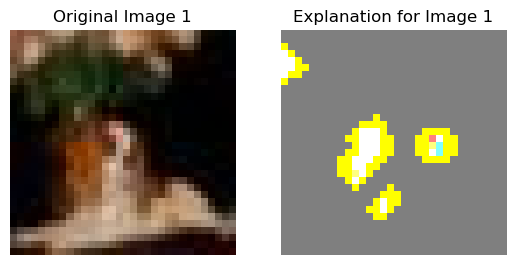

  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


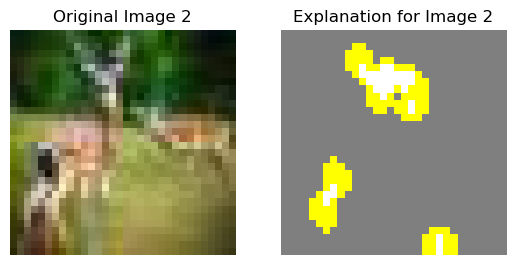

  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


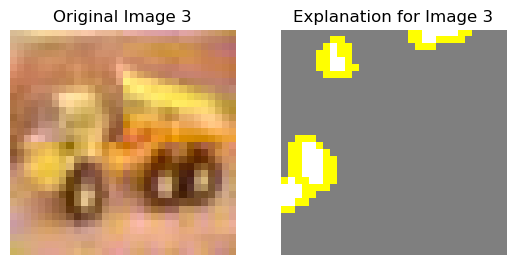

  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


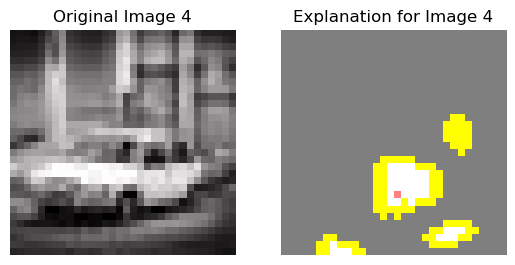

  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


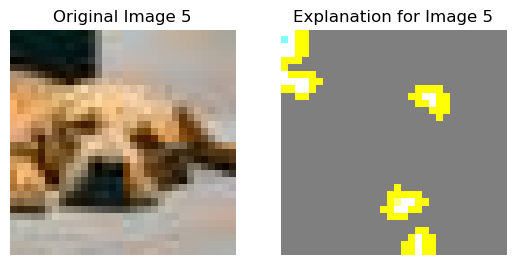

In [112]:
def predict_fn(images):
    images_tensor = torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # Convert to PyTorch tensor and normalize
    model.eval()
    with torch.no_grad():
        outputs = model(images_tensor)
        probs = torch.softmax(outputs, dim=1)
    return probs.numpy()

# Instantiate LIME explainer
explainer = lime_image.LimeImageExplainer()

# Define transformation to apply to input images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Assuming input size of CNN is (224, 224)
    transforms.ToTensor(),
])

# Iterate over 10 images in the test set
for i, (image, label) in enumerate(test_loader):
    if i >= 5:
        break
    
    # Preprocess image and convert to numpy array
    image_numpy = image.permute(0, 2, 3, 1).numpy()  # Convert PyTorch tensor to numpy array
    image_numpy = (image_numpy * 255).astype(np.uint8)  # Convert to uint8 for LIME
    
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_numpy[0])
    plt.title(f"Original Image {i+1}")
    plt.axis('off')
    
    # Generate explanations
    explanation = explainer.explain_instance(image_numpy[0], predict_fn, top_labels=1, hide_color=0, num_samples=1000, segmentation_fn=slic)
    
    # Visualize explanations
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title(f"Explanation for Image {i+1}")
    plt.axis('off')
    
    plt.show()

## GradCAM 

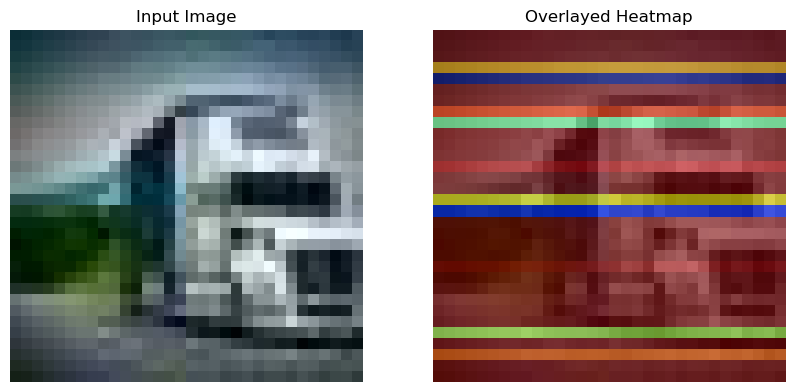

In [90]:
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        
        self.model.eval()
        self.register_hooks()
        
    def register_hooks(self):
        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]
        
        def forward_hook(module, input, output):
            self.activations = output
        
        target_layer = self.model._modules[self.target_layer]
        backward_handle = target_layer.register_backward_hook(backward_hook)
        forward_handle = target_layer.register_forward_hook(forward_hook)
        
        self.forward_handle = forward_handle
        self.backward_handle = backward_handle
        
    def generate(self, input_image, target_class=None):
        self.model.zero_grad()
        
        output = self.model(input_image.unsqueeze(0))
        
        if target_class is None:
            target_class = output.argmax()
        
        one_hot_output = torch.zeros_like(output)
        one_hot_output[0][target_class] = 1
        
        self.model.zero_grad()
        output.backward(gradient=one_hot_output, retain_graph=True)
        
        pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])
        activations = self.activations.detach()
        
        weighted_activations = torch.zeros(activations.size(1))
        for i in range(activations.size(1)):
            weighted_activations[i] = torch.sum(pooled_gradients[i] * activations[0, i, :, :])
        
        heatmap = torch.clamp(weighted_activations, min=0)
        heatmap /= torch.max(heatmap)
        
        return heatmap.numpy()

# Initialize Grad-CAM
grad_cam = GradCAM(model, 'conv2')  # Choose the target layer

# Overlay heatmap onto input image
def overlay_heatmap(input_image, heatmap, alpha=0.6):
    # Convert input image to numpy array and transpose dimensions
    input_image = np.transpose(input_image.cpu().numpy(), (1, 2, 0))
    
    # Resize heatmap to match the input image size
    heatmap = cv2.resize(heatmap, (input_image.shape[1], input_image.shape[0]))
    
    # Normalize heatmap values
    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
    
    # Convert heatmap to RGB
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    
    # Convert heatmap to the same data type as the input image
    heatmap = heatmap.astype(np.float32) / 255.0
    
    # Overlay heatmap onto input image
    overlaid_img = cv2.addWeighted(input_image, 1 - alpha, heatmap, alpha, 0)
    
    return overlaid_img

# Example usage
image_index = 0  # Choose the index of the image in the test set
input_image, _ = test_data[image_index]
heatmap = grad_cam.generate(input_image.to(device))

# Overlay heatmap onto input image
overlaid_img = overlay_heatmap(input_image, heatmap)

# Plot the overlaid image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.transpose(input_image.cpu().numpy(), (1, 2, 0)))
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(overlaid_img)
plt.title('Overlayed Heatmap')
plt.axis('off')

plt.show()

## ResNet Model

In [2]:
import torchvision.models as models

In [3]:
class ResNetModel(nn.Module):
    def __init__(self):
        super(ResNetModel, self).__init__()
        self.resnet = models.resnet18(pretrained=True)  # You can choose different versions like resnet34, resnet50, etc.
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 2)  # 2 classes: fake and real
        
    def forward(self, x):
        return self.resnet(x)

NameError: name 'nn' is not defined

In [142]:
model = ResNetModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [1]:
num_epochs = 20  

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_accuracy = 100 * correct / total
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_accuracy:.2f}%')

NameError: name 'model' is not defined

In [ ]:
 model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy:.2f}%')
    test_accuracies.append(test_accuracy)


In [ ]:
cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print("Classification Report:")
    print(classification_report(all_labels, all_predictions, target_names=['fake', 'real']))

## VGGNetModel

In [ ]:
class VGGNetModel(nn.Module):
    def __init__(self):
        super(VGGNetModel, self).__init__()
        self.vgg = models.vgg16(pretrained=True)  # You can also try vgg11, vgg19, etc.
        self.vgg.classifier[6] = nn.Linear(self.vgg.classifier[6].in_features, 2)  # 2 classes: fake and real
        
    def forward(self, x):
        return self.vgg(x)


In [ ]:
model = VGGNetModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 20  

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_accuracy = 100 * correct / total
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_accuracy:.2f}%')

In [ ]:
 model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy:.2f}%')
    test_accuracies.append(test_accuracy)


In [ ]:
cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print("Classification Report:")
    print(classification_report(all_labels, all_predictions, target_names=['fake', 'real']))